In [6]:
!pip install cudaq==0.9.1

Sampling a dephasing channel with mid-circuit measurement

In [7]:
import cudaq
import numpy as np
import matplotlib.pyplot as plt

@cudaq.kernel
def dephasing_channel(theta:float, t: int):
    q = cudaq.qvector(10)

    h(q)
    for _ in range(t):
        ry.ctrl(theta,q[0],q[1])
        q1 = mz(q[1])
        if q1:
            reset(q[1]) # reset the target qubit
    h(q[0])

    # measure the ctrl qubit
    mz(q[0])

p = 0.1 # dephasing probability
theta = float(2*np.arccos(np.sqrt(1-p))) # transform the dephasing probability to the rotation angle
shots = 2048
steps = 20 # number of time steps

#print(cudaq.draw(dephasing_channel, theta, 3))

In [8]:
import time

cudaq.set_target('nvidia')
#cudaq.set_target('qpp-cpu')

prob_0 = [] # list to store the probability of measuring 0
t0 = time.time()
for t in range(steps):
    counts = cudaq.sample(dephasing_channel, theta, t, shots_count=shots)
    counts = dict(counts.items())
    prob_0.append(counts['0']/shots)
print(time.time()-t0)

80.51396322250366


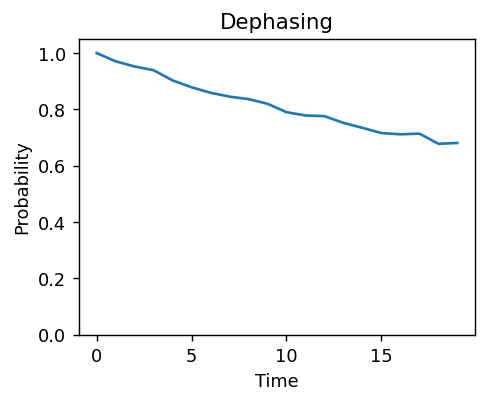

In [9]:
fig, ax = plt.subplots(figsize=(4,3), dpi=128)

plt.title("Dephasing")
plt.plot(prob_0)
plt.ylabel("Probability")
plt.xlabel("Time")
plt.ylim(0,1.05)
plt.show()

Other detailed usage of sampling quantum kernel with mid-circuit measurement

In [10]:
import cudaq

@cudaq.kernel
def midCircMeasTest():
    q = cudaq.qvector(1)
    h(q)
    midCircuit = mz(q)
    h(q)

# Perform sampling
result = cudaq.sample(midCircMeasTest)

# Access the `__global__` measurement counts
global_counts = result.get_register_counts('__global__')
print("Global counts:", global_counts)

# Access the `midCircuit` measurement counts
midCircuit_counts = result.get_register_counts('midCircuit')
print("midCircuit counts:", midCircuit_counts)

# Alternatively, iterate through `items` to see key-value pairs ('__global__' is default)
print("Items in result:")
for bitstring, count in result.items():
    print(f"{bitstring}: {count}")

# Access individual counts with `count`
zero_count = result.count("0", "__global__")
one_count = result.count("1", "__global__")
print(f"Counts for '0': {zero_count}, Counts for '1': {one_count}")

Global counts: { 0:1000 }

midCircuit counts: { 0:522 1:478 }

Items in result:
0: 1000
Counts for '0': 1000, Counts for '1': 0
